In [56]:
import numpy as np
import neurokit2 as nk

import pyhrv
import pyhrv.tools as tools
import pyhrv.frequency_domain as fd

import pandas as pd
import os, json
from tsfresh import extract_features
import matplotlib.pyplot as plt

In [57]:
workDir = 'D:/LAB/放鬆-三總/Relaxing/分析'
os.chdir(workDir)

In [58]:
feature_names = ['RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_SDSD', 'RRV_CVBB',
       'RRV_CVSD', 'RRV_MedianBB', 'RRV_MadBB', 'RRV_MCVBB', 'RRV_VLF',
       'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn', 'RRV_SD1',
       'RRV_SD2', 'RRV_SD2SD1', 'RRV_ApEn', 'RRV_SampEn', 'RRV_DFA_alpha1',
       ]
print(len(feature_names))
       
lable_names = ['addictLabel', 'stateLabel']

data_name = ['data_name']

sampleRate = 64

inputPath = "Data/Sort/"
featureOutputPath = "Feature/"

21


In [59]:
def feature_Cal(resData, sampleRate, dataCol = "RESdata"):
    cleaned = nk.rsp_clean(resData[dataCol], sampling_rate=sampleRate)

    # Extract peaks
    peak_signals, info = nk.rsp_peaks(cleaned)
    amplitude = nk.rsp_amplitude(cleaned, peak_signals)

    fig = nk.signal_plot([resData[dataCol], amplitude], labels=["RSP", "Amplitude"], subplots=True)


In [61]:
def CalRESFeatures(filePath, sampleRate, output = False):
    
    dataList = os.listdir(filePath)

    for dataName in dataList:

        dataInfo = dataName[:-4].split('_')
        
        data = pd.read_csv("%s%s"%(filePath, dataName), index_col=0, names=['TimeStamp', 'RESdata'])
        data = data[data.RESdata > -1000]

        print(dataInfo)
        
        features = feature_Cal(data, sampleRate, 'RESdata')


['VR', '1', 'PostTest', 'Res']
['VR', '1', 'PreTest', 'Res']
['VR', '1', 'VRTest', 'Res']

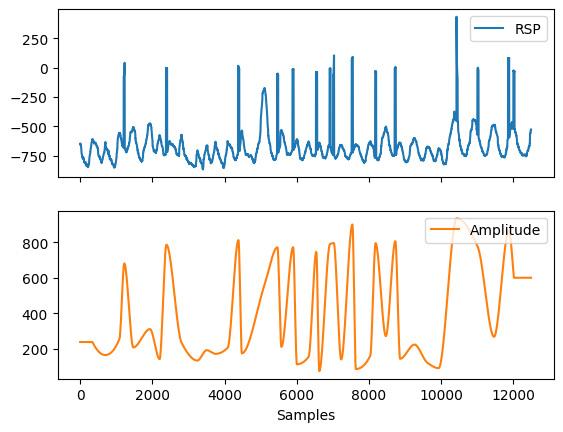

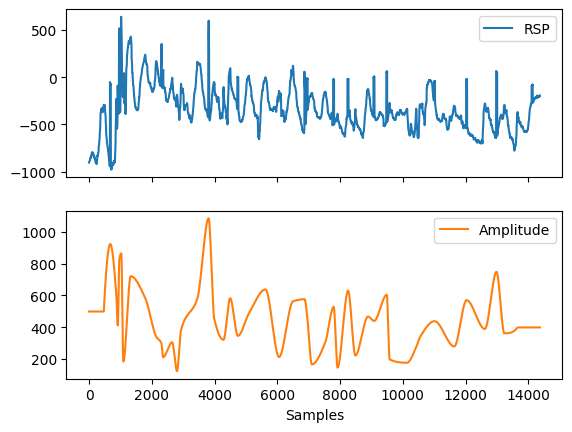

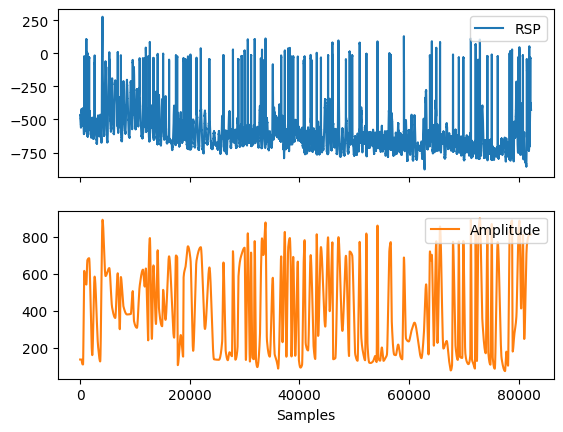

In [62]:
feature = CalRESFeatures(inputPath, sampleRate=sampleRate, output=False)

In [63]:
# feature.to_csv('Data/Feature/RES.csv')
feature